# Numpy Tutorial Notes

The [tutorial slides](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf)
provide a useful summary of numpy features and concepts.  This notebook captures similar examples, notes and comments.

```
git clone https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019.git
cd Numpy-Tutorial-SciPyConf-2019
```

See [YouTube Video](https://youtu.be/ZB7BZMhfPgk).

In [1]:
import numpy as np

In [2]:
a = np.array(range(1, 5))
a

array([1, 2, 3, 4])

In [3]:
type(a)

numpy.ndarray

In [4]:
a.dtype

dtype('int64')

In [5]:
f = np.array([1.2, 2.3, 4.5, 5.6])
f.dtype

dtype('float64')

In [6]:
a[0]

1

In [7]:
a[0] = 10
a

array([10,  2,  3,  4])

In [8]:
# floats are truncated to int
a[0] = 11.5
a

array([11,  2,  3,  4])

In [9]:
a.ndim

1

In [10]:
# tuple of N elements in each dimension; like a.size in matlab
a.shape

(4,)

In [11]:
# size is the total number of elements
a.size

4

### element-wise or vectorized operations

In [12]:
a + f

array([12.2,  4.3,  7.5,  9.6])

In [13]:
a * f

array([13.2,  4.6, 13.5, 22.4])

In [14]:
a / f

array([9.16666667, 0.86956522, 0.66666667, 0.71428571])

In [15]:
f ** a

array([  7.43008371,   5.29      ,  91.125     , 983.4496    ])

In [16]:
# vectorized operations work with constants
a * 10

array([110,  20,  30,  40])

### Universal Functions (ufuncs)

In [17]:
np.sin(a)

array([-0.99999021,  0.90929743,  0.14112001, -0.7568025 ])

## Indexing and Slicing Examples

In [18]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [19]:
# slice columns - red
a[:,[1,3]]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [20]:
# slice columns - red
a[:, 1::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [21]:
# last row - yellow
a[-1,:]

array([20, 21, 22, 23, 24])

In [22]:
# fifth row 
a[4,:]

array([20, 21, 22, 23, 24])

In [23]:
# blue
a[1::2, :-1:2]

array([[ 5,  7],
       [15, 17]])

In [24]:
# blue
a[1::2, :3:2]

array([[ 5,  7],
       [15, 17]])

### Slice Assignments

In [25]:
a = np.array([0, 1, 2, 3, 4])
a[-2:]

array([3, 4])

In [26]:
a[-2:] = range(2)
a

array([0, 1, 2, 0, 1])

In [27]:
# assign a constant to slice
a[-2:] = 99
a

array([ 0,  1,  2, 99, 99])

In [28]:
# assignment shape must equal shape assigned to
try:
   a[-2:] = range(5) 
except ValueError as err:
   print(err)

could not broadcast input array from shape (5,) into shape (2,)


### Indexing Shared Memory

In [29]:
a = np.arange(1,5)
a

array([1, 2, 3, 4])

In [30]:
# a slice assignment points to shared memory
b = a[:2]
b

array([1, 2])

In [31]:
assert id(a[0]) == id(b[0])

In [32]:
b[0] = -1
b

array([-1,  2])

In [33]:
# note this also changes the shared data in a
a

array([-1,  2,  3,  4])

### Indexing Syntax Explained

In [34]:
a[0] == a.__getitem__(0)

True

In [35]:
a[0] = 100
a

array([100,   2,   3,   4])

In [36]:
a.__setitem__(0, 100)
a

array([100,   2,   3,   4])

### Data Copies

In [37]:
a = np.arange(1,5)
b = a.copy()

In [38]:
b[0] = -1
b[0], a[0]

(-1, 1)

In [39]:
id(b[0]), id(a[0])

(140635599512880, 140635599512880)

### Fancy Indexes and Masks

Fancy indexes return copies instead of views into the original array

In [40]:
a = np.array([-1, -3, 1, 4, -6, 9, 3])
a

array([-1, -3,  1,  4, -6,  9,  3])

In [41]:
# threshold data below zero
negative = a < 0
negative

array([ True,  True, False, False,  True, False, False])

In [42]:
# get all the items that are negative
a[negative]

array([-1, -3, -6])

In [43]:
# set all the negative items to zero
a[negative] = 0
a

array([0, 0, 1, 4, 0, 9, 3])

### Fancy Indexes in 2D

Each dimension is indexed to create tuple-indexes

In [44]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [45]:
# select items with values: 2, 13, 16, 19
a[[0,2,3,3],[2,3,1,4]]

array([ 2, 13, 16, 19])

Read the indexes above as tuples like:
(0, 2), (2,3), (3, 1), (3, 4)

This is like zipping the index arrays

In [46]:
list(zip([0,2,3,3],[2,3,1,4]))

[(0, 2), (2, 3), (3, 1), (3, 4)]

In [47]:
# use a mask to select all items divisible by 3
mask = (a % 3) == 0
mask

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False],
       [ True, False, False,  True, False],
       [False,  True, False, False,  True]])

In [48]:
a[mask]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

### Multidimensional Indexing

See 
- [YouTube Segment](https://youtu.be/ZB7BZMhfPgk?t=4735)
- [tutorial slides](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf) (slide 31)

Numpy dimension idexes are row-major
- numpy is row-major system
  - Fortan and Matlab are column-major system
- in a row-major system, each new dimension is *pre-pended* 
  - 1D: the axis=0 increases by columns
  - 2D:
    - the axis=0 increases by rows
    - the axis=1 increases by columns 
  - 3D:
    - the axis=0 increases by depth
    - the axis=1 increases by rows
    - the axis=2 increases by columns 
  - 4D:
    - the axis=0 increases by blocks of 3D (e.g. time dimension)
    - the axis=1 increases by depth
    - the axis=2 increases by rows
    - the axis=3 increases by columns 

In the `.shape` tuple, the last dimension (`-1`) is always the columns of the array.  These items in the last dimension are stored in a contiguous block of memory.

## Creating Arrays

See slide 32 of the [tutorial slides](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf).

## Array Computation Methods

See:
- [YouTube Segment](https://youtu.be/ZB7BZMhfPgk?t=5120)
- [tutorial slides](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf) (slide 37)

For the example data

`a = np.arange(-15, 15).reshape(5, 6) ** 2`

compute:
- the maximum of each row (one max per row)
- the mean of each column (one mean per column)
- the position of the overall minimum (requires several steps)

In [49]:
# example data
a = np.arange(-15, 15).reshape(5, 6) ** 2
a

array([[225, 196, 169, 144, 121, 100],
       [ 81,  64,  49,  36,  25,  16],
       [  9,   4,   1,   0,   1,   4],
       [  9,  16,  25,  36,  49,  64],
       [ 81, 100, 121, 144, 169, 196]])

In [50]:
# a rule of thumb is to choose an axis by using the
# element of the array shape that will be collapsed, e.g.
a.shape  # (5, 6)
# axis=0 will collapse over 5 rows (drop rows)
# axis=1 will collapse over 6 columns (drop columns)

(5, 6)

In [51]:
# max of each row will collapse over 6 columns or index=1
np.max(a, axis=1)

array([225,  81,   9,  64, 196])

In [52]:
# the axis=-1 can be used, which is always columns in numpy
np.max(a, axis=-1)

array([225,  81,   9,  64, 196])

In [53]:
# mean of columns will collapse over 5 rows or index=0
np.mean(a, axis=0)

array([81., 76., 73., 72., 73., 76.])

In [54]:
min_idx = np.argmin(a)
min_idx

15

In [55]:
min_arridx = np.unravel_index(min_idx, a.shape)
min_arridx

(2, 3)

## Array Broadcasting

See:
- [YouTube - Computation Rules](https://youtu.be/ZB7BZMhfPgk?t=5112)
- [tutorial slides](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf) (slide 38 & 45)

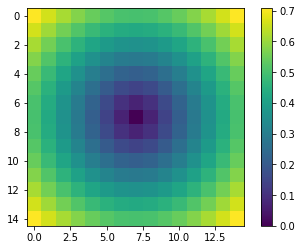

In [56]:
# example of distance from center
import matplotlib.pyplot as plt
a = np.linspace(0, 1, 15) - 0.5
b = a[:, np.newaxis] # b.shape == (15, 1)
dist2 = a**2 + b**2 # broadcasting sum.
dist = np.sqrt(dist2)
plt.imshow(dist)
plt.colorbar()

## Numpy Arrays in Memory

See:
- [YouTube Segment](https://youtu.be/ZB7BZMhfPgk?t=7296)
- [tutorial slides](https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019/blob/master/slides.pdf) (slide 59)